In [1]:
! pip install matplotlib numpy

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import write
import IPython.display as ipd
import math

## Pure tone generation

In [312]:
from enum import Enum
from functools import partial
from scipy import signal

class Wave(Enum):
    @staticmethod
    def triangular(args):
        return signal.sawtooth(args, 0.5)
    
    HARMONIC = partial(np.sin)
    SQUARE = partial(signal.square)
    TRIANGULAR = partial(triangular.__func__)
    SAWTOOTH = partial(signal.sawtooth)
    

def tone(f, t, waveform, fs):
    samples = np.linspace(0, t, t * fs + 1)
    return waveform.value( 2* np.pi * f * samples)

In [313]:
f = 430
t = 5
fs = 5000
samples =  np.linspace(0, t, t * fs + 1)


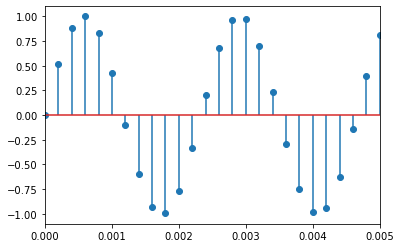

In [314]:
plt.xlim(0, 0.005)
values = tone(f, t, Waveform.HARMONIC, fs)
plt.stem(samples, values)
ipd.Audio(values, rate=fs)
# write('HARMONIC.wav', fs, values)

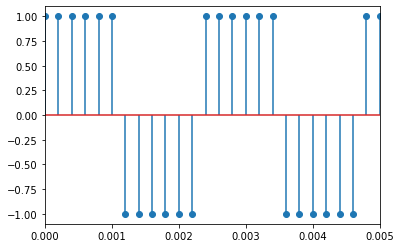

In [315]:
plt.xlim(0, 0.005)
values = tone(f, t, Waveform.SQUARE, fs)
plt.stem(samples, values)
ipd.Audio(values, rate=fs)
# write('SQUARE.wav', fs, values)

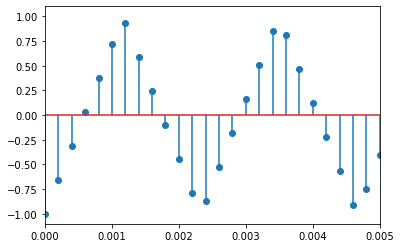

In [316]:
plt.xlim(0, 0.005)
values =  tone(f, t, Waveform.TRIANGULAR, fs)
plt.stem(samples, values)
ipd.Audio(values, rate=fs)
# write('TRIANGULAR.wav', fs, values)

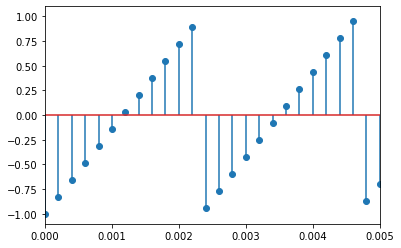

In [317]:
plt.xlim(0, 0.005)
values =  tone(f, t, Waveform.SAWTOOTH, fs)
plt.stem(samples, values)
ipd.Audio(values, rate=fs)
# write('SAWTOOTH.wav', fs, values)

## Function musical_tone 

In [318]:
def right_exp(a, N):
    """
    Create function like y(x)=a^(x/N)
    """
    return lambda x: [math.pow(a, i/N ) for i in x] 

def single_square_wave(N, M):
    """
    Create function like y(x) = 1 when ( N <= x <= M ) otherwise 0 
    """
    return lambda x: [ int(N <= i <= M) for i in x]

def apply_damping(input_signal , db, t, fs):
    damping_in_times = math.pow(10, db / 20) # Db = 20 log(F2/F1)
    samples_count = len(input_signal)
    
    exp_func = right_exp(damping_in_times, t)
    sqr_func = single_square_wave(0, t)
    
    samples = np.linspace(0, t, t * fs + 1)
    
    return input_signal * exp_func(samples) * sqr_func(samples)
    

In [319]:
F_UPPER_BOUND = 20000

def musical_tone(f, t , waveform = Waveform.HARMONIC, fs = 44100, db = -20):
    
    f_tones = [f]
    while (f_tones[-1] + f <= F_UPPER_BOUND):
        f_tones.append(f_tones[-1] + f)

    tones = [ tone(x, t, waveform, fs) for x in f_tones ]
    
    result_signal = np.sum(tones, 0) 
    
    dumped_signal = apply_damping(result_signal, db, t, fs)
    
    norm_signal = dumped_signal / max(dumped_signal)
    
    return norm_signal
     

        
#     tones_count = len(tones)
#     exp = right_exp(0.1, tones_count)
#     for idx, _e in enumerate(exp(range(tones_count))):
#     tones[idx] *= _e

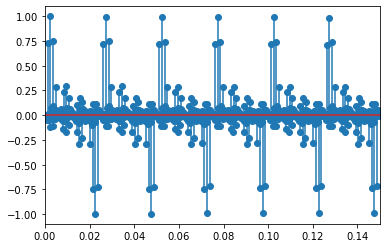

In [338]:
plt.xlim(0, 0.15)
f = 840
t = 5
fs = 5000

result = musical_tone(f, t, fs=fs, db= -5)
plt.stem(samples, result)
ipd.Audio(result, rate=fs)